# Question 5 (10 pts) --COMPLETE
Describe the main differences between K-means and DB-Scan, use examples.
(scikit)

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import cluster, datasets

Starting with a random data sample, where each classification is a different color cluster.

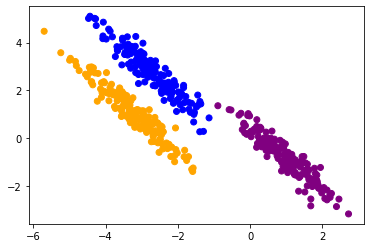

In [43]:
n_samples = 500

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

data=aniso
color=['orange','blue','purple', 'red','green','black']
X,y=data
plt.scatter(X[:,0], X[:,1],  c=np.array([color[x] for x in y] ))
plt.show()

Cluster classification using kmeans methodology. While we give the kmean methodolgy the given number of clusters there actually is, kmeans trys to limit the variance between clusters. By doing this naturally it will go to a higher number of clusters for classification. At that point a larger number is not better and there is an optimal point of clusters that can be found for any type of clustering problem. Which can be deduced by using the elbow method on kmeans.

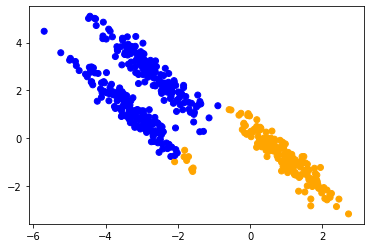

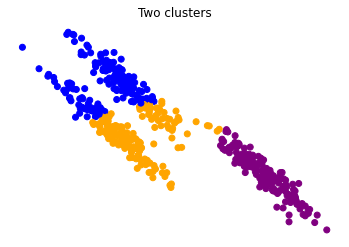

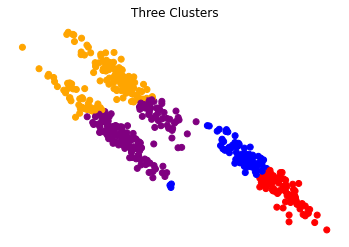

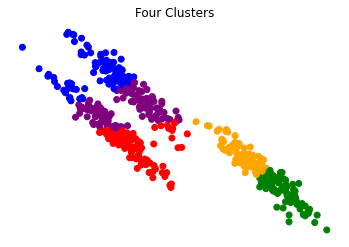

Text(0.5, 1.0, 'Five Clusters')

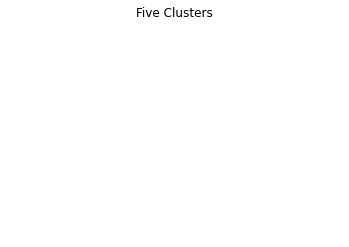

In [48]:
# kmeans
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters=2, random_state=0).fit(X)
pred=clustering.predict(X)

clustering3 = KMeans(n_clusters=3, random_state=0).fit(X)
pred3=clustering3.predict(X)

clustering4 = KMeans(n_clusters=4, random_state=0).fit(X)
pred4=clustering4.predict(X)

clustering5 = KMeans(n_clusters=5, random_state=0).fit(X)
pred5=clustering5.predict(X)

#plotting data cluster classifications

  
# showing image
plt.show(plt.scatter(X[:,0], X[:,1],  c=np.array([color[x] for x in pred] )))
plt.axis('off')
plt.title("Two clusters")
  

# showing image
plt.show(plt.scatter(X[:,0], X[:,1],  c=np.array([color[x] for x in pred3] )))
plt.axis('off')
plt.title("Three Clusters")
  
# showing image
plt.show(plt.scatter(X[:,0], X[:,1],  c=np.array([color[x] for x in pred4] )))
plt.axis('off')
plt.title("Four Clusters")
  
# showing image
plt.show(plt.scatter(X[:,0], X[:,1],  c=np.array([color[x] for x in pred5] )))
plt.axis('off')
plt.title("Five Clusters")

In [50]:
dist = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    dist.append(kmeanModel.inertia_)#loss function kmean

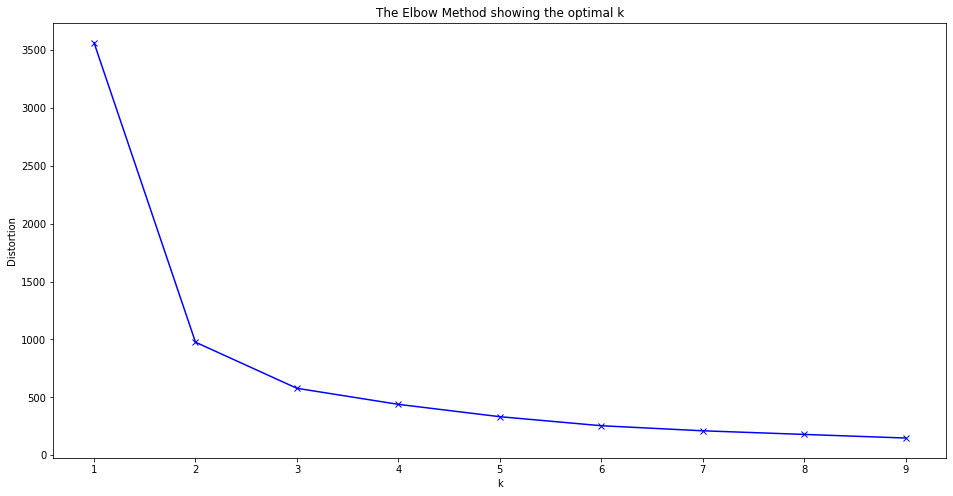

In [52]:
plt.figure(figsize=(16,8))
plt.plot(K, dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For each kmeans cycle given any k it will try to limit the mean variance between the different clusters. Notice in the above graph after 3-4 clusters the variance does not drastically decrease, even though it is going down. A prime k for this example is then 2 clusters. It did the best it could do with this type of data distribution.

Dbscan on the other hand is not trying to limit the variance between its clusters. Instead it is trying to find a point of connection between data clusters. Using the eps value a core is found with a minimum number of points in that core being satisfied. If additional datapoints can be reached by the eps then those are also added to that cluster. outliers are not included in the currently found eps cluster. Unlike kmeans, it does not try to make things fit 
where they should not, if they are out of bounds, they are out of bounds.

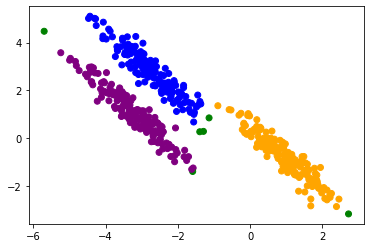

In [59]:
#db-scan
from sklearn.cluster import DBSCAN

pred = DBSCAN(eps=0.4, min_samples=5).fit_predict(X)
# ploting data cluster classifications
plt.scatter(X[:,0], X[:,1],  c=np.array([color[x%6] if x>=0 else 'green' for x in pred ] ))
plt.show()

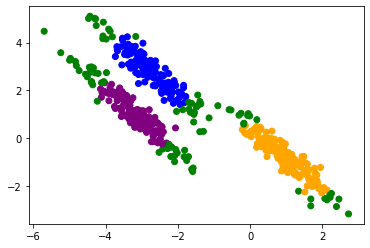

In [54]:
pred = DBSCAN(eps=0.4, min_samples=20).fit_predict(X)
# ploting data cluster classifications
plt.scatter(X[:,0], X[:,1],  c=np.array([color[x%6] if x>=0 else 'green' for x in pred ] ))
plt.show()

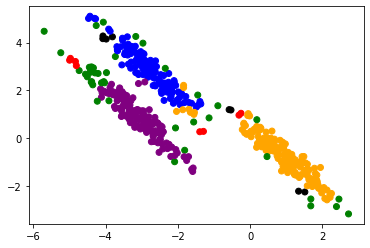

In [57]:
pred = DBSCAN(eps=0.2, min_samples=2).fit_predict(X)
# ploting data cluster classifications
plt.scatter(X[:,0], X[:,1],  c=np.array([color[x%6] if x>=0 else 'green' for x in pred ] ))
plt.show()

If given a low eps value and too high of a minimum number of samples without a proper data structure, the dbscan fails, however using hyperparameter tuning with the data allows optimal classification, unlike kmeans, in this particular instance.